In [8]:
# =============================================================================
# Image Processing Pipeline: Raw → Grayscale → Colored Heatmap
# 图像处理流程：原始图像 → 灰度图 → 彩色热力图
# =============================================================================
# Purpose / 用途:
#   1. Convert raw images to grayscale / 将原始图像转换为灰度图
#   2. Apply custom color mapping to grayscale images / 对灰度图应用自定义颜色映射
# =============================================================================

import cv2
import numpy as np
import os


In [9]:
# =============================================================================
# Step 1: Convert Raw Images to Grayscale
# 步骤1：将原始图像转换为灰度图
# =============================================================================

import os
from PIL import Image

def convert_images_to_gray(input_directory, output_directory):
    """
    Convert all images in a directory to grayscale format.
    将目录中的所有图像转换为灰度格式。
    
    Parameters / 参数:
    ----------------
    input_directory : str
        Path to the directory containing images to be converted
        包含待转换图像的目录路径
    output_directory : str
        Path to the directory where grayscale images will be saved
        灰度图像保存的目录路径
    
    Processing Logic / 处理逻辑:
    --------------------------
    1. Create output directory if it doesn't exist / 如果输出目录不存在则创建
    2. Iterate through all files in the input directory / 遍历输入目录中的所有文件
    3. Filter for .jpg and .png files / 筛选出 .jpg 和 .png 文件
    4. Convert each image to grayscale ('L' mode) / 将每张图像转换为灰度图（'L'模式）
    5. Save to output directory with 'gray' prefix / 以 'gray' 前缀保存到输出目录
    
    Output / 输出:
    ------------
    Grayscale images saved in output directory with 'gray' prefix
    灰度图像保存在输出目录下，文件名添加 'gray' 前缀
    
    Example / 示例:
    -------------
    Input:  0_raw_png/400_1.png
    Output: 1_gray_colored_png/gray400_1.png
    """
    # Create output directory if it doesn't exist / 如果输出目录不存在则创建
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
        print(f"Created output directory: {output_directory}")
        print(f"已创建输出目录: {output_directory}")
    
    # Counter for processed images / 已处理图像计数器
    processed_count = 0
    
    for filename in os.listdir(input_directory):
        # Check if file is an image / 检查文件是否为图像
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read image / 读取图像
            input_path = os.path.join(input_directory, filename)
            img = Image.open(input_path)
            
            # Convert to grayscale / 转换为灰度图
            gray_img = img.convert('L')
            
            # Save with 'gray' prefix to output directory / 以 'gray' 前缀保存到输出目录
            output_filename = 'gray' + filename
            output_path = os.path.join(output_directory, output_filename)
            gray_img.save(output_path)
            
            processed_count += 1
            print(f"Processed / 已处理: {filename} -> {output_filename}")
    
    print(f"\nTotal images processed / 共处理图像数: {processed_count}")
    print(f"Output directory / 输出目录: {output_directory}")

In [10]:
# =============================================================================
# Execute Step 1: Convert images to grayscale
# 执行步骤1：转换图像为灰度图
# =============================================================================
# Note / 注意:
# - Input directory: 0_raw_png / 输入目录: 0_raw_png
# - Output directory: 1_gray_colored_png / 输出目录: 1_gray_colored_png
# - Original images will be preserved / 原始图像将被保留
# - Grayscale images will be created with 'gray' prefix / 灰度图将以 'gray' 前缀创建
# =============================================================================

# Define input and output directories / 定义输入和输出目录
input_dir = "0_raw_png"
output_dir = "1_gray_colored_png"

# Convert all images to grayscale / 转换所有图像为灰度图
convert_images_to_gray(input_dir, output_dir)

Processed / 已处理: 800_1.png -> gray800_1.png
Processed / 已处理: 800_3.png -> gray800_3.png
Processed / 已处理: 800_2.png -> gray800_2.png
Processed / 已处理: 400_1.png -> gray400_1.png
Processed / 已处理: 400_2.png -> gray400_2.png
Processed / 已处理: 400_3.png -> gray400_3.png
Processed / 已处理: 600_1.png -> gray600_1.png
Processed / 已处理: 600_2.png -> gray600_2.png
Processed / 已处理: 600_3.png -> gray600_3.png

Total images processed / 共处理图像数: 9
Output directory / 输出目录: 1_gray_colored_png


In [11]:
# =============================================================================
# Step 2: Apply Custom Color Mapping to Grayscale Images
# 步骤2：对灰度图应用自定义颜色映射
# =============================================================================

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image
import numpy as np

def map_gray_to_color(image_path, output_path=None):
    """
    Apply custom color mapping to a grayscale image and save the result.
    对灰度图像应用自定义颜色映射并保存结果。
    
    Parameters / 参数:
    ----------------
    image_path : str
        Path to the grayscale image file
        灰度图像文件的路径
    output_path : str, optional
        Path to save the colored image. If None, saves with '_color.png' suffix
        保存彩色图像的路径。如果为None，则以'_color.png'后缀保存
    
    Color Mapping Logic / 颜色映射逻辑:
    ---------------------------------
    The custom colormap is defined with specific RGB values at different intensity levels:
    自定义颜色映射在不同强度级别定义了特定的RGB值：
    
    Intensity Range / 强度范围:
    - 0.0 - 0.2:  Black / 黑色
    - 0.2 - 0.3:  Blue transition / 蓝色过渡
    - 0.3 - 0.4:  Cyan transition / 青色过渡
    - 0.4 - 0.5:  White transition / 白色过渡
    - 0.5 - 0.6:  Yellow-green transition / 黄绿色过渡
    - 0.6 - 0.65: Yellow transition / 黄色过渡
    - 0.65 - 1.0: Red-white transition / 红白色过渡
    
    WARNING / 警告:
    -------------
    DO NOT modify the color mapping parameters!
    不要修改颜色映射参数！
    These values are carefully calibrated for specific visualization requirements.
    这些值是为特定可视化需求精心校准的。
    
    Output / 输出:
    ------------
    1. Colored heatmap image saved with '_color.png' suffix
       彩色热力图保存为 '_color.png' 后缀
    2. Display of the colored image / 显示彩色图像
    3. Display of color gradient bar / 显示颜色渐变条
    
    Example / 示例:
    -------------
    Input:  gray400_1.png
    Output: gray400_1_color.png
    """
    
    # -------------------------------------------------------------------------
    # Define custom color mapping / 定义自定义颜色映射
    # -------------------------------------------------------------------------
    # WARNING: DO NOT MODIFY THESE VALUES! / 警告：不要修改这些值！
    cdict = {
        'red':   ((0.0, 0.0, 0.0),
                  (0.2, 0.0, 0.0),
                  (0.3, 0.0, 0.0),
                  (0.4, 0.0, 0.0),
                  (0.5, 1.0, 1.0),
                  (0.6, 0.0, 0.0),
                  (0.65, 1.0, 1.0),
                  (1.0, 1.0, 1.0)),

        'green': ((0.0, 0.0, 0.0),
                  (0.2, 0.0, 0.0),
                  (0.3, 0.0, 0.0),
                  (0.4, 0.8, 0.8),
                  (0.5, 1.0, 1.0),
                  (0.6, 1.0, 1.0),
                  (0.65, 1.0, 1.0),
                  (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                  (0.2, 0.0, 0.0),
                  (0.3, 1.0, 1.0),
                  (0.4, 0.8, 0.8),
                  (0.5, 1.0, 1.0),
                  (0.6, 0.0, 0.0),
                  (0.65, 0.0, 0.0),
                  (1.0, 0.0, 0.0))
    }

    # Create custom colormap with 256 levels / 创建256级自定义颜色映射
    cmap = mcolors.LinearSegmentedColormap('my_colormap', cdict, 256)

    # -------------------------------------------------------------------------
    # Load and process image / 加载并处理图像
    # -------------------------------------------------------------------------
    # Open image and convert to numpy array / 打开图像并转换为numpy数组
    img = Image.open(image_path)
    img_array = np.array(img)

    # -------------------------------------------------------------------------
    # Display and save colored image / 显示并保存彩色图像
    # -------------------------------------------------------------------------
    plt.imshow(img_array, cmap=cmap)
    plt.axis('off')  # Hide axes / 隐藏坐标轴
    
    # Remove all spines for clean visualization / 移除所有边框以获得干净的可视化效果
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Save colored image / 保存彩色图像
    if output_path is None:
        output_path = image_path.replace('.png', '_color.png')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()  # Close figure to save memory / 关闭图形以节省内存
    
    return output_path
    
    # -------------------------------------------------------------------------
    # Display color gradient bar / 显示颜色渐变条
    # -------------------------------------------------------------------------
    # Create gradient from 0 to 1 / 创建从0到1的渐变
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))

    # Note: Gradient bar display removed for batch processing
    # 注意：批量处理时移除了渐变条显示
    

In [12]:
# =============================================================================
# Execute Step 2: Apply color mapping to all grayscale images
# 执行步骤2：对所有灰度图应用颜色映射
# =============================================================================
# Note / 注意:
# - Input directory: 1_gray_colored_png / 输入目录: 1_gray_colored_png
# - Output: Same directory with '_color.png' suffix / 输出：同一目录，添加'_color.png'后缀
# - Processes all grayscale images with 'gray' prefix / 处理所有带'gray'前缀的灰度图
# =============================================================================

import os

# Define input directory / 定义输入目录
gray_dir = "1_gray_colored_png"

# Counter for processed images / 已处理图像计数器
processed_count = 0

# Process all grayscale images / 处理所有灰度图
for filename in os.listdir(gray_dir):
    # Only process files with 'gray' prefix / 仅处理带'gray'前缀的文件
    if filename.startswith('gray') and (filename.endswith('.png') or filename.endswith('.jpg')):
        input_path = os.path.join(gray_dir, filename)
        
        # Generate output filename / 生成输出文件名
        output_filename = filename.replace('.png', '_color.png').replace('.jpg', '_color.jpg')
        output_path = os.path.join(gray_dir, output_filename)
        
        # Apply color mapping / 应用颜色映射
        map_gray_to_color(input_path, output_path)
        
        processed_count += 1
        print(f"Processed / 已处理: {filename} -> {output_filename}")

print(f"\nTotal images processed / 共处理图像数: {processed_count}")
print(f"All colored images saved in / 所有彩色图像保存在: {gray_dir}")    

Processed / 已处理: gray800_3.png -> gray800_3_color.png
Processed / 已处理: gray800_2.png -> gray800_2_color.png
Processed / 已处理: gray800_1.png -> gray800_1_color.png
Processed / 已处理: gray600_2.png -> gray600_2_color.png
Processed / 已处理: gray600_3.png -> gray600_3_color.png
Processed / 已处理: gray600_1.png -> gray600_1_color.png
Processed / 已处理: gray400_2.png -> gray400_2_color.png
Processed / 已处理: gray400_3.png -> gray400_3_color.png
Processed / 已处理: gray400_1.png -> gray400_1_color.png

Total images processed / 共处理图像数: 9
All colored images saved in / 所有彩色图像保存在: 1_gray_colored_png


Color scale bar saved / 色彩标尺已保存: 1_gray_colored_png/colormap_scale_bar.png


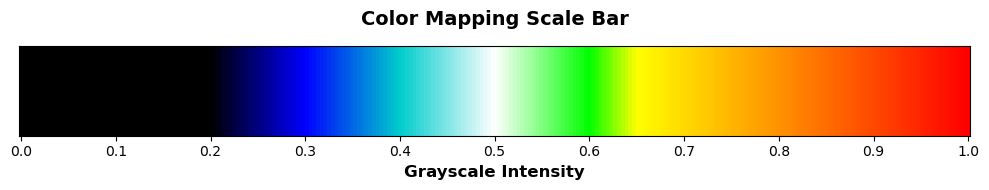


Color Mapping Scale Bar
Intensity range: 0.0 - 1.0
Output saved to: 1_gray_colored_png/colormap_scale_bar.png


In [15]:
# =============================================================================
# Step 3: Display Color Mapping Scale Bar
# 步骤3：显示色彩映射标尺
# =============================================================================
# Purpose / 用途:
#   Display the color gradient bar to show the mapping from grayscale to colors
#   显示颜色渐变条，展示从灰度到颜色的映射关系
# =============================================================================

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define the same color mapping as used in Step 2 / 定义与步骤2相同的颜色映射
# WARNING: DO NOT MODIFY THESE VALUES! / 警告：不要修改这些值！
cdict = {
    'red':   ((0.0, 0.0, 0.0),
              (0.2, 0.0, 0.0),
              (0.3, 0.0, 0.0),
              (0.4, 0.0, 0.0),
              (0.5, 1.0, 1.0),
              (0.6, 0.0, 0.0),
              (0.65, 1.0, 1.0),
              (1.0, 1.0, 1.0)),

    'green': ((0.0, 0.0, 0.0),
              (0.2, 0.0, 0.0),
              (0.3, 0.0, 0.0),
              (0.4, 0.8, 0.8),
              (0.5, 1.0, 1.0),
              (0.6, 1.0, 1.0),
              (0.65, 1.0, 1.0),
              (1.0, 0.0, 0.0)),

    'blue':  ((0.0, 0.0, 0.0),
              (0.2, 0.0, 0.0),
              (0.3, 1.0, 1.0),
              (0.4, 0.8, 0.8),
              (0.5, 1.0, 1.0),
              (0.6, 0.0, 0.0),
              (0.65, 0.0, 0.0),
              (1.0, 0.0, 0.0))
}

# Create custom colormap / 创建自定义颜色映射
cmap = mcolors.LinearSegmentedColormap('my_colormap', cdict, 256)

# Create gradient array / 创建渐变数组
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Create figure with appropriate size / 创建合适大小的图形
fig, ax = plt.subplots(figsize=(10, 2))

# Display gradient bar / 显示渐变条
im = ax.imshow(gradient, aspect='auto', cmap=cmap)

# Set x-axis labels / 设置x轴标签
ax.set_xticks(np.linspace(0, 255, 11))
ax.set_xticklabels(np.round(np.linspace(0, 1, 11), 2), fontsize=10)
ax.set_xlabel('Grayscale Intensity', fontsize=12, fontweight='bold')

# Remove y-axis / 移除y轴
ax.set_yticks([])

# Add title / 添加标题
ax.set_title('Color Mapping Scale Bar', 
             fontsize=14, fontweight='bold', pad=15)

# Adjust layout / 调整布局
plt.tight_layout()

# Save the scale bar / 保存标尺
output_path = '1_gray_colored_png/colormap_scale_bar.png'
plt.savefig(output_path, dpi=150, bbox_inches='tight')
print(f"Color scale bar saved / 色彩标尺已保存: {output_path}")

# Display the scale bar / 显示标尺
plt.show()

print("\n" + "=" * 80)
print("Color Mapping Scale Bar")
print("=" * 80)
print("Intensity range: 0.0 - 1.0")
print(f"Output saved to: {output_path}")
print("=" * 80)
